<a href="https://colab.research.google.com/github/parulgo7/GHH22_EmployeeEmpowerment/blob/main/PG7WFM_codeathon_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Comparison of Regression Models on Housing Prices in Boston, MA

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![(Image Credit Boston.gov)](https://miro.medium.com/max/1000/1*WYZCnpM7bE3Wq4NNxx7jDA.jpeg)

In this assignment, you will practice the 8 steps of an end-to-end ML project in the context of a **regression** problem in the [Ames Housing Dataset on Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) (Image Credit: Boston.gov). You will attempt to predict the housing prices in Boston, MA. For references, you may refer to my slides or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same Colab workspace.

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 50 pts. You will gain points depending on how you perform in the following sections.

*BONUS POINTS:* 10 bonus points will be given (as Extra credits) for those who score among the top-10 performance while following strictly the assignment guidelines. Best of luck to all!

## Step 1: Big Picture and Setup
Write a paragraph explaining the context of the problem in which you are trying to investigate. Your paragraph may frame the problem and objectives by answering the following questions:
* What is the task: regression, classification, clustering, visualization?
* What to expect, how to use, and how to benefit from this model?
* What performance measure to evaluate?
* How much data is available or should be collected?
* What learning algorithm to be used?
* How much effort is to be spent?
* Verify the assumptions that have been made about the context

The task here is regression --specifically predicting the final price of a home based off of certain features. The expectation from this model is to get predicted sale prices for homes based off of certain features. The model can be used to get an estimate for what is likly to be the price of the house upon sale given the conditions remain the same or similar enough to what was given to the model during training. The model can benefit others because they can gather an idea on what their homes will sell for and make renovations accordingly. The performance measure to evaluate is RMSE value, with the lower the better value. The data available is the dataset in "train.csv" given in Kaggle. Effort will be spent understanding the variables and fine tuning an appropriate model to the expectation of the performance metrics.

Assumptions include that the data present within "train.csv" is enough to train the chosen model. Additionally, the sets of data the prediction set is intended to be performed upon has no major or significant differences than the training data (such as inclusion of solar panels or gentrification of an area... these factors are not included in our dataset but can impact sale prices of homes).

In [ ]:
# Python ≥3.5 is required
#import sys #
# Scikit-Learn ≥0.20 is required
import sklearn # general ml package

# Common imports
import numpy as np # fundamental package for scientific computing
import os # to run file I/O operation

# to make this notebook's output stable across runs
# any number will do, as long as it is used consistently
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "codeathon_1"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  """Save the selected figure into disc under an image extention and resolution

  Parameters
  ----------
  fig_id : figure handle
    The id number of the figure
  tight_layout : boolean (True or False)
    Specifies whenther the layout should be tight or not
  fig_extension: string
    Under what extension should the file be saved ("png" or "jpg")
  resolution: int
    the quality of the figure (ie. 100,200,300)

  Returns
  -------
  void
    Does not return any value
  """

  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

## Step 2: Load the Data
We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing values?
 * What are some basic statistics you can learn right away about this dataset?

In [ ]:
import pandas as pd

# To help you get started, a load function is provided below.
# You will need to fill in the code under #TODO to make it work.
def loadBostonHousingData():
  # The column names are adopted from the dataset page on Kaggle
  housing = pd.read_csv("/content/sample_data/train.csv")
  #Question... are we also uploading the test set right now too???
  return housing

#Now onto data insights....
housing = loadBostonHousingData()

housing.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Through the quick summary statistics we did, we can gain some preliminary information about our dataset. We have 80 features.

To determine if we have null values, we see the counts outputed for each feature. The maximum "Non Null Count" is 1460 for this dataset. Thus, through some quick math, certain features have some null values. For example, Alley has 1369 null values. We will later fill in these null values in our data cleaning step.

In [ ]:
# printing the attributes required.
# How big is your dataset? (in terms of MB)
# How many entries does it have?
# How many features does it have?
# Does it contain any categorical data?
# Is there any missing values?
# What are some basic statistics you can learn right away about this dataset?

housing.info()

bool_series = pd.isnull(housing["PoolQC"])
housing[bool_series]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125




The answers to the questions above can be seen in the figure above. In summation, the dataset is 0.924 MB. There are 1460 entries with 81 features. There are many categorical variables such as GarageCond and are indicated with an object data type. There are missing values present, as seen with some features not have 1460 entries (like MiscFeature having only 54 entries). The basic statistics are count, mean, max, etc and can be seen below. We specifically note that the range of SalePrice is 34900.000000 to 755000.000000.

In [ ]:
#basic statistics we can learn
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


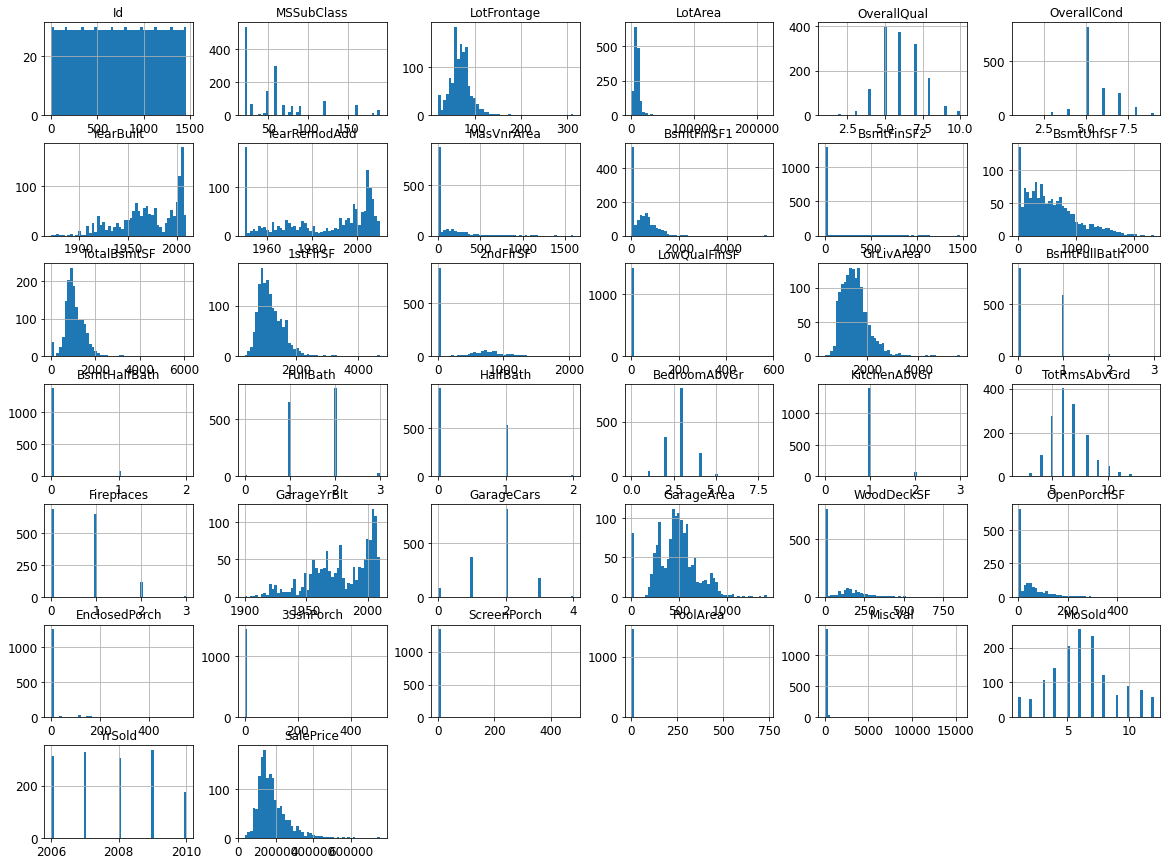

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

We get a sense of the distribution for each feature from the plots above. ID seems to be uniformly distributed, SalePrice has a slight right skew and so do a few others (like GrLivArea).

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into train set (80%) and test set (20%)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [ ]:
print( train_set.shape )


(1168, 81)


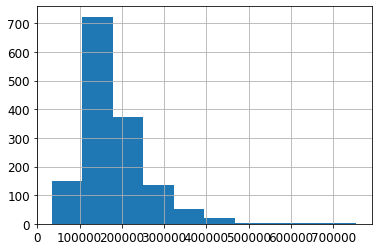

In [ ]:
housing['SalePrice'].hist()

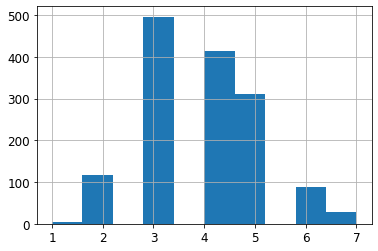

In [ ]:
housing["SalePriceMod"] = pd.cut(housing["SalePrice"],
                               bins=[0., 50000, 100000, 150000, 200000, 300000, 400000., np.inf],
                               labels=[1, 2, 3, 4, 5, 6, 7])
housing['SalePriceMod'].value_counts()
housing['SalePriceMod'].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["SalePriceMod"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

## Step 3. Discover and visualize the data to gain insights
**Data Discovery:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than others. This information will help you confirm the weights of your regression model later on.

In [ ]:
# Your code to visualize the data here

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("SalePriceMod", axis = 1, inplace=True)

In [ ]:
# Make a copy of the stratified train set
housing = strat_train_set.copy()

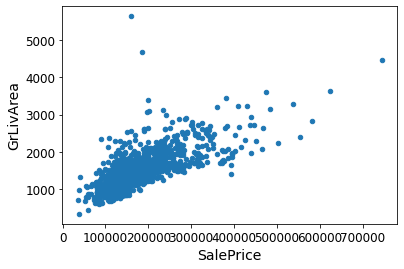

In [ ]:
housing.plot(kind="scatter", x='SalePrice', y='GrLivArea')

The plot above shows a good, tight correlation between SalePrice and GrLivArea. Most likely, this feature will be important to our model. We can get other insights on correlations against SalePrice by looking at the corr_matrix below.

In [ ]:
corr_matrix = housing.corr()
corr_matrix.shape

(38, 38)

In [ ]:
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.798266
GrLivArea        0.703412
GarageCars       0.649180
GarageArea       0.627259
1stFlrSF         0.603383
TotalBsmtSF      0.602351
FullBath         0.570693
YearBuilt        0.537481
TotRmsAbvGrd     0.530379
YearRemodAdd     0.513570
GarageYrBlt      0.489876
MasVnrArea       0.469207
Fireplaces       0.464650
BsmtFinSF1       0.393883
LotFrontage      0.355635
WoodDeckSF       0.333414
OpenPorchSF      0.324792
2ndFlrSF         0.307798
HalfBath         0.294728
LotArea          0.266434
BsmtFullBath     0.241875
BsmtUnfSF        0.206794
BedroomAbvGr     0.179505
ScreenPorch      0.132977
PoolArea         0.102204
MoSold           0.082291
3SsnPorch        0.042575
LowQualFinSF    -0.012725
BsmtFinSF2      -0.016064
Id              -0.020633
BsmtHalfBath    -0.028103
MiscVal         -0.029368
YrSold          -0.031954
OverallCond     -0.094576
MSSubClass      -0.105406
KitchenAbvGr    -0.133081
EnclosedPorch   -0.141976
Name: SalePr

Correlation values are important in determining what variables other variables depend on.

Of course, a higher correlation value (closer to 1 or -1) indicates a stronger correlation. It makes sense that *SalesPrice* has a correlation of 1 because it is being correlated against itself.

Correlation values below +/- 0.5 are less correlated with the other variables. When we are looking to drop variables during data cleaning, we will be looking towards dropping those.

In [ ]:
# In case of issues, copy of the housing dataset without drops

housing_without_drops = housing.copy()

In [ ]:
# Doing the actual drops of features that were not highly correlated

del housing["EnclosedPorch"]
del housing["KitchenAbvGr"]
del housing["MSSubClass"]
del housing["OverallCond"]
del housing["YrSold"]
del housing["MiscVal"]
del housing["BsmtHalfBath"]
del housing["Id"]
del housing["BsmtFinSF2"]
del housing["LowQualFinSF"]
del housing["3SsnPorch"]
del housing["MoSold"]
del housing["PoolArea"]
del housing["ScreenPorch"]
del housing["BedroomAbvGr"]
del housing["BsmtUnfSF"]
del housing["BsmtFullBath"]
del housing["LotArea"]
del housing["HalfBath"]
del housing["2ndFlrSF"]
del housing["OpenPorchSF"]
del housing["WoodDeckSF"]
del housing["LotFrontage"]
del housing["BsmtFinSF1"]
del housing["Fireplaces"]
del housing["GarageYrBlt"]
del housing["MasVnrArea"]

# To determine all the column names
# for col in housing.columns:
#   print(col)



In [ ]:
for col in housing.columns:
  print(col)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
GrLivArea
FullBath
KitchenQual
TotRmsAbvGrd
Functional
FireplaceQu
GarageType
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition
SalePrice


##  Step 4: Data Preparation and Cleaning
Since we can only use the "train.csv", you have to "artificially" split the data into training set, validation set, and test set. You may use the `train_test_split()` function *twice*: first is to split into train and test, then to split the train again into training and validation sets.

Next, you need to construct the following:

* **Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the `Imputer` class.

* **Feature Scaling:** Your task is to call the `StandardScaler` to normalize the value of each feature.

* **Transformation Pipeline:** More importantly, you will need to integrate the above operations into a `Pipeline` to process and transform the training data (via `fit_transform()`), then use the same pipeline to transform any validation and testing data (using `transform()` only).

In [ ]:
# To do numerical values, drop categorical variables...

housing_numerical = housing.select_dtypes(include=[np.number])
# We will use this later to list the num attributes


In [ ]:
# Now to do the categorical variables!!!!

# from sklearn.preprocessing import OneHotEncoder

housing_cat = housing.select_dtypes(include='object')

# This will be helpful when we do our scaling....
cat_attribs = []
for col in housing_cat.columns:
  cat_attribs.append(col)

print(cat_attribs)
housing_cat.head(10)


['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
806,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1117,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,Sawyer,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
615,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,MnPrv,NaN,WD,Abnorml
439,RL,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,...,Detchd,Unf,TA,TA,Y,NaN,GdPrv,Shed,ConLI,Normal
489,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
947,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
467,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
572,RL,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,Timber,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,New,Partial
354,RL,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
472,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,...,Basment,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Here we can see that we have our categorical features (with type 'object' as determined from our initial assessment). Notice how there are NaN values present. Once we do our OneHotEncoder, these values will be appropriately filled. We do this during our pipeline step later on.

In [ ]:
# Your code check for missing values, feature scaling, and put all transformation into a pipeline here
from sklearn.model_selection import train_test_split

# To my understanding, the test set should be transformed but fit (but also not scaled), so we're going to do our splits carefully.

housing_training, housing_test = train_test_split(housing, test_size=0.2, train_size=0.8)
housing_labels = housing_training["SalePrice"].copy()

housing_training_hypo, housing_validation = train_test_split(housing_training, test_size=0.2, train_size=0.8)
housing_validation_labels = housing_validation["SalePrice"].copy()

del housing_training_hypo['SalePrice']
del housing_training['SalePrice']



In [ ]:
# Let's get our num_pipeline all set up.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

# housing_num_tr = num_pipeline.fit_transform(housing_training_num)

In [ ]:
from sklearn.compose import ColumnTransformer



num_attribs = list(housing_numerical)
num_attribs.remove('SalePrice')
# print(num_attribs)
# cat_attribs has been populated from above!!!
# print(cat_attribs)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing_training)




In [ ]:
# Now we can invoke our pipeline!

print(housing_training.shape)
print(housing_prepared.shape)
print(housing_labels.shape)

# housing_labels.shape

# Good! It checks out!

(934, 53)
(934, 270)
(934,)


In [ ]:
housing_prepared

<934x270 sparse matrix of type '<class 'numpy.float64'>'
	with 49502 stored elements in Compressed Sparse Row format>

## Step 5: Model Selection
You should use (at the minimum) the basic ML models which we’ve covered: `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. Optionally, you may go for the extra miles by doing some research and try some more advanced models (ie. `Artificial Neural Networks`). You may use `RMSE` as the performance measure.

You must use 5-fold CV on the data set to evaluate the performance of your models (following the sample codes on Colab 02).


In [ ]:
# Try a few models here

# Let's try LinearRegression()
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)




LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

18891.308429576162

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [ ]:


housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

115.74917734340282

0.0! We've badly overfit the data. This is why we use cross-validation :)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [37729.17321464 37093.75305668 41379.61015738 39096.70679825
 61326.66481405 39446.29425281 43157.44121437 44064.28432037
 51416.43477266 37433.56765594]
Mean: 43214.393025714824
Standard deviation: 7290.689852415909


In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [32929.52916673 23611.65058247 71388.37310213 28840.80874229
 37057.0104225  31833.25001859 23556.69965996 22781.02699599
 49621.16585284 31489.81433527]
Mean: 35310.93288787783
Standard deviation: 14197.44980217785


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

11967.087983537247

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [33359.27780315 23929.58673074 48280.20589558 21746.41332769
 39403.34336194 32531.80044745 20998.40517343 26359.21167063
 44368.2297029  30256.05128136]
Mean: 32123.252539487054
Standard deviation: 8949.68595940246


In [ ]:
# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
#                          scoring="neg_mean_squared_error", cv=10)
# tree_rmse_scores = np.sqrt(-scores)

## Step 6: Model Tuning

In this step, you should attempt to use one of the provided tools for hyperparameter tuning: `GridSearchCV`, `RandomizedSearchCV` to identify the best set of hyperparameters for your model. After tweaking your models, you eventually should report the 5-fold CV RMSE of your tuned model.

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = [
#     # try 12 (3×4) combinations of hyperparameters
#     {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
#     # then try 6 (2×3) combinations with bootstrap set as False
#     {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
#   ]

# forest_reg = RandomForestRegressor(random_state=42)
# # train across 5 folds, that's a total of 90 rounds of training
# grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
#                            scoring='neg_mean_squared_error',
#                            return_train_score=True)
# grid_search.fit(housing_prepared, housing_labels)

# grid_search.best_params_

# cvres = grid_search.cv_results_
# # zip() is to combine the column "mean_test_score" with struct "params"
# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(np.sqrt(-mean_score), params)

Since we have so many features we're going to try out RandomizedSearchCV to narrow down our hyperparameters. Many configurations were chosen to tweak the hyperparameters, with two iterations shown below.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=0.001, high=1),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faf593b8dd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faf593b8750>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

35587.064922405436 {'max_features': 7, 'n_estimators': 180}
34329.07137700256 {'max_features': 29, 'n_estimators': 15}
34480.515628976704 {'max_features': 11, 'n_estimators': 72}
34353.53522322792 {'max_features': 29, 'n_estimators': 21}
36009.12592907594 {'max_features': 7, 'n_estimators': 122}
33888.73961629803 {'max_features': 19, 'n_estimators': 75}
34206.9152698957 {'max_features': 11, 'n_estimators': 88}
33305.291788068214 {'max_features': 21, 'n_estimators': 100}
34879.174010496776 {'max_features': 8, 'n_estimators': 152}
37387.691306889945 {'max_features': 3, 'n_estimators': 150}


In [ ]:
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=80), # 40, 50, 54, 110
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faf593a6610>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faf593a6d50>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

32839.78867746866 {'max_features': 52, 'n_estimators': 93}
33963.17078022744 {'max_features': 15, 'n_estimators': 107}
32585.643454676167 {'max_features': 72, 'n_estimators': 189}
33237.196843923215 {'max_features': 21, 'n_estimators': 103}
32826.05966383989 {'max_features': 75, 'n_estimators': 88}
33084.30462218985 {'max_features': 24, 'n_estimators': 131}
33333.11362339983 {'max_features': 22, 'n_estimators': 53}
38249.17191268025 {'max_features': 2, 'n_estimators': 88}
33505.06052247408 {'max_features': 30, 'n_estimators': 38}
38346.15601060547 {'max_features': 2, 'n_estimators': 192}


The best hyperparameters were determined to be:

30046.848499457545 {'max_features': 60, 'n_estimators': 161}

In [ ]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([2.24368924e-01, 5.34105767e-02, 1.21803671e-02, 6.22598860e-02,
       5.01457311e-02, 1.16887530e-01, 2.01269501e-02, 1.26625379e-02,
       1.03317447e-01, 5.78519445e-02, 3.04148311e-04, 2.02872007e-04,
       5.45487274e-05, 2.07117659e-03, 1.87630613e-03, 2.35806936e-05,
       3.94881646e-05, 1.21216653e-04, 2.69949782e-04, 3.32774816e-04,
       1.10139723e-03, 1.05996981e-03, 4.62997267e-04, 2.16701025e-03,
       1.94079996e-03, 1.31004564e-03, 9.75613617e-04, 1.50509740e-03,
       0.00000000e+00, 6.60050478e-04, 1.42041712e-03, 2.02004555e-04,
       8.46238904e-05, 6.67792294e-04, 9.32168247e-04, 6.80418969e-04,
       4.80990476e-04, 2.59975237e-04, 5.96101659e-06, 4.21738898e-05,
       1.98368302e-04, 6.11431224e-04, 6.61694175e-04, 1.17056818e-03,
       1.72839628e-03, 2.44011492e-04, 2.76688192e-04, 1.15176935e-04,
       1.64290060e-04, 2.67996182e-04, 2.34674301e-05, 5.15148992e-04,
       3.16391774e-03, 3.61486315e-03, 3.35146952e-04, 9.04163538e-05,
      

In [ ]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = []

for name in cat_encoder.categories_:
  cat_one_hot_attribs.append(name)

len(cat_encoder.categories_[4])
cat_encoder.categories_[4]

cat_one_hot_attribs = list(cat_encoder.categories_)
cat_one_hot_attribs

attributes = num_attribs + cat_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.22436892425809987, 'OverallQual'),
 (0.11688753019820805, 'GrLivArea'),
 (0.10331744713665052, 'GarageCars'),
 (0.062259885999994755, 'TotalBsmtSF'),
 (0.057851944522561476, 'GarageArea'),
 (0.05341057668463645, 'YearBuilt'),
 (0.05014573109339594, '1stFlrSF'),
 (0.020126950107472372, 'FullBath'),
 (0.01266253792409133, 'TotRmsAbvGrd'),
 (0.0121803670560867, 'YearRemodAdd'),
 (0.0031639177374184254, 'SaleCondition'),
 (0.0021670102498148095, 'RoofStyle'),
 (0.0020711765942284764, 'LotShape'),
 (0.0019407999645157162, 'RoofMatl'),
 (0.0018763061329015382, 'LandContour'),
 (0.0017283962750979252, 'GarageFinish'),
 (0.0015050973952103394, 'MasVnrType'),
 (0.0014204171182365301, 'Foundation'),
 (0.0013100456362015276, 'Exterior1st'),
 (0.0011705681845078364, 'GarageType'),
 (0.0011013972289050497, 'Condition2'),
 (0.0010599698053442644, 'BldgType'),
 (0.0009756136171271009, 'Exterior2nd'),
 (0.0009321682471344082, 'BsmtFinType1'),
 (0.000680418969115325, 'BsmtFinType2'),
 (0.0006677922

Now we can get an idea on what features were important to the model and to what degree! GrLivArea is one of the top rankers! (that's the variable we were specifically looking at before in data discovery).

## Step 7: Solution Presentation
Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/supervisor). Focus on answering the following:

* How can you pitch your solution to this project?
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution?

Deciding what price to sell a home at is difficult, especially with variations in housing features such as garages and types of bathrooms like half baths or full baths. The chosen machine learning model can be utilized to indicate predictions for "SalePrice" of homes in the ID area based off of certain features. Users of this model can indicate which features of their home are present within the model and gain an idea on what to aim for when selling their home.

Many other insights can also be made such as which features are less correlated with SalePrice such as YearSold and OverallCond. Moving forward, better predictions can be arrived at with a better model. This can mean exploring other models such as Neural Networks, and additionally more efforts in finetuning parameters.

## Step 8: Model Launching, Monitoring, and Updating
You don't need to do anything for this step. However, in the real-world, this is an iterative process where you launch, monitor, and update your model (on the cloud).

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my slides and/or the textbook
 * Talk to the TA, they are available and there to help you during their office hours
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Codeathon 1:...".

Best of luck and have fun!